                           Mkt-RF   SMB   HML   RMW   CMA     RF
Date                                                            
2016-05-24 00:00:00+00:00    1.43  0.61 -0.34 -0.12 -0.39  0.001
2016-05-25 00:00:00+00:00    0.72 -0.14  0.58  0.20 -0.11  0.001
2016-05-26 00:00:00+00:00   -0.04 -0.16 -0.53  0.15 -0.22  0.001
2016-05-27 00:00:00+00:00    0.49  0.35 -0.17 -0.12 -0.10  0.001
2016-05-31 00:00:00+00:00   -0.01  0.45 -0.34 -0.19 -0.33  0.001


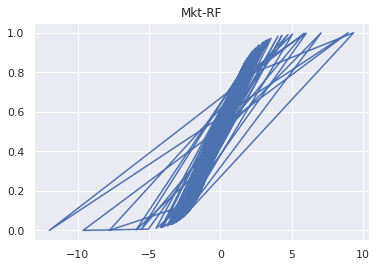

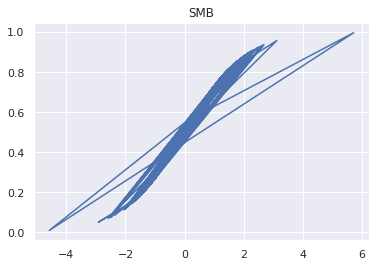

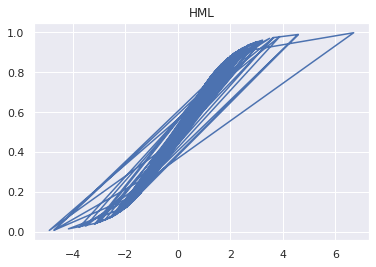

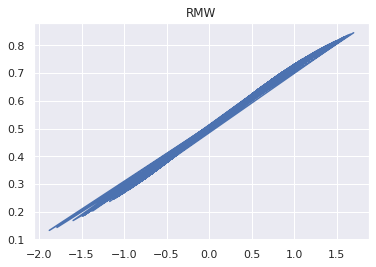

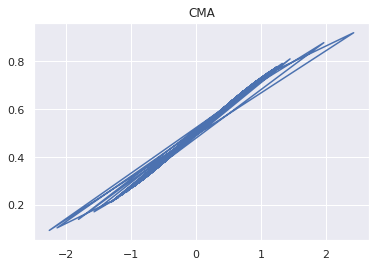

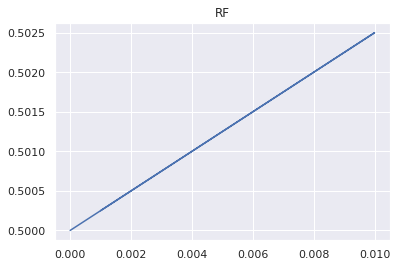

X.shape: (1222, 6)
y.shape: (1222,)


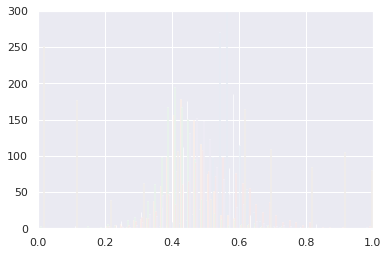

ytrue.shape: (306,)
ypred.shape: (306,)
accuracy and recall：
               precision    recall  f1-score   support

          -9       0.00      0.00      0.00         1
          -7       0.00      0.00      0.00         1
          -5       0.00      0.00      0.00         1
          -4       0.00      0.00      0.00         1
          -3       0.00      0.00      0.00         6
          -2       0.00      0.00      0.00         6
          -1       0.00      0.00      0.00        16
           0       0.77      1.00      0.87       234
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.76       306
   macro avg       0.06      0.07      0.06       306
weighted avg      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(30.5, 0.5, 'true')

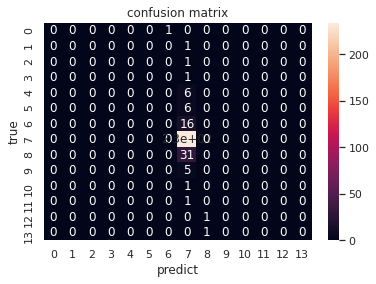

In [ ]:

#Group B  time series is an index, factor, interest rate, or economic quantity for which you will be predicting 1M returns or changes (the longer-term) – one ticker or quantity.
#Given that the logistic classifier is formulated for binomial/multinomial prediction, it is recommended to explore a histogram and set up multinomial scheme, eg to predict buckets not necessarily a numerical value.

import os
import time
import datetime
import numpy as np
import pandas as pd
#for implementation of new direct calls ==> import pandas_datareader as pdr
import pandas_datareader as pdr
from pandas_datareader.famafrench import get_available_datasets
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
# import yfinance as yf

#Group B
#Loading Factor Data
data = pdr.DataReader("F-F_Research_Data_5_Factors_2x3_daily", "famafrench")[0]
data.index = pd.to_datetime(data.index, format="%Y%m%d", utc=True) #necessary to convert to UTC
# data = yf.download("^GSPC ^VIX ^FTSE", start="2010-10-01", end="2017-09-30")
print(data.head())
title = data.columns
data = data
X = data
target_names = "Mkt-RF"
# "Mkt-RF"
y = np.array(data[target_names]).reshape(-1,1).astype('int').ravel()

def sigmoid(x):
  return 1. / (1. + np.exp(-x))

# plot sigmoid
for i in range(6):
  x = X[title[i]]
  # print("x:",x)
  yi = sigmoid(x)
  # print("yi:",yi)
  # fig = plt.figure()
  plt.plot(x, yi)
  plt.title(title[i])
  plt.show()
# normalize ,scaling to uniform [0, 1] range.
X = MinMaxScaler().fit(data).transform(data)
# RobustScaler().fit(data).transform(data)
# preprocessing.normalize(X)

print("X.shape:",X.shape)
print("y.shape:",y.shape)
#plot histogram
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(X, bins=50, alpha=0.7)
plt.ylim(0,300)
plt.xlim(0,1)
plt.show()

#split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
mlt = LogisticRegression(penalty='l1',solver='liblinear')
mlt.fit(x_train, y_train)
y_predict = mlt.predict(x_test)
y_pred_pro = mlt.predict_proba(x_test)
# y_pred_pro = np.transpose([pred[:] for pred in y_pred_pro])
# score
print("ytrue.shape:", y_test.shape)
print("ypred.shape:", y_predict.shape)
# print("ypred_pro.shape:", y_pred_pro.shape)
# print("area under ROC curve,AUC：\r\n", roc_auc_score(y_test, y_pred_pro,multi_class='ovo',average='macro'))
#accuracy and recall
print("accuracy and recall：\r\n", classification_report(y_test, y_predict))
#plot confusion matrix
C2= confusion_matrix(y_test, y_predict)
sns.set()
f,ax=plt.subplots()
sns.heatmap(C2,annot=True,ax=ax)
ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')